In [65]:
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
from glob import glob 
from fastcore.xtras import load_pickle

import matplotlib.pyplot as plt 
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use(['science', 'nature'])

import matplotx

import pandas as pd 
import numpy as np

%matplotlib inline

In [67]:
all_res = glob('out/**/*.pkl')

In [68]:
compiled_res = []
compiled_gpr = []

for res in all_res:
    loaded = load_pickle(res)
    repre = loaded['representation']
    num_points = loaded['num_train_points']

    metrics = {
        'representation': loaded['representation'],
        'num_train_points': loaded['num_train_points'],
        'mae': loaded['mean_absolute_error'],
        'max_error': loaded['max_error'],
        'mse': loaded['mean_squared_error']
    }

    compiled_res.append(metrics)


    gpr_metrics = {
        'num_train_points': loaded['num_train_points'],
        'mae': loaded['gpr_baseline']['mean_absolute_error'],
        'max_error': loaded['gpr_baseline']['max_error'],
        'mse': loaded['gpr_baseline']['mean_squared_error']
    }

    compiled_gpr.append(gpr_metrics)

In [69]:
compiled_res = pd.DataFrame(compiled_res)
compiled_gpr = pd.DataFrame(compiled_gpr)

In [70]:
compiled_grouped_res = compiled_res.groupby(['representation', 'num_train_points']).agg(['mean', 'std'])

In [71]:
compiled_gpr_grouped = compiled_gpr.groupby(['num_train_points']).agg(['mean', 'std'])

In [72]:
compiled_grouped_res

mae             max_error            \
                                     mean       std        mean       std   
representation num_train_points                                             
SELFIES        10                1.138400       NaN    3.650000       NaN   
               20                0.684640       NaN    4.180000       NaN   
               50                0.676000       NaN    3.800000       NaN   
               100               0.667480       NaN    3.670000       NaN   
               200               0.635680       NaN    4.570000       NaN   
               1000              0.471280       NaN    1.720000       NaN   
SMILES         10                0.896507  0.060100    3.536667  0.066583   
               20                0.812140  0.050431    3.965000  0.502046   
               50                0.686250  0.068139    3.742500  0.513314   
               100               0.658220  0.014001    3.100000  0.113137   
               200               0.590400       NaN    3.340000       NaN   
               1000              0.416360       NaN    1.700000       NaN   
               5000              0.756360       NaN  100.310000       NaN   

                                       mse            
                                      mean       std  
representation num_train_points                       
SELFIES        10                 1.826592       NaN  
               20                 0.769824       NaN  
               50                 0.766043       NaN  
               100                0.783226       NaN  
               200                0.695634       NaN  
               1000               0.343909       NaN  
SMILES         10                 1.288353  0.130023  
               20                 1.096063  0.114632  
               50                 0.800940  0.127158  
               100                0.719752  0.017720  
               200                0.600017       NaN  
               1000               0.283844       NaN  
               5000              40.460532       NaN

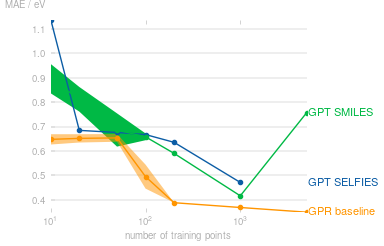

In [73]:
with plt.style.context(matplotx.styles.dufte):
    fig, ax = plt.subplots(1,1)
    ax.plot(
        compiled_grouped_res.loc["SELFIES", :].index, 
        compiled_grouped_res.loc["SELFIES", :]['mae']['mean'], 
        label='GPT SELFIES', 
        marker='o'
    )

    ax.fill_between(
        compiled_grouped_res.loc["SELFIES", :].index, 
        compiled_grouped_res.loc["SELFIES", :]['mae']['mean'] - compiled_grouped_res.loc["SELFIES", :]['mae']['std'], 
        compiled_grouped_res.loc["SELFIES", :]['mae']['mean'] + compiled_grouped_res.loc["SELFIES", :]['mae']['std'], 
    )

    ax.plot(
        compiled_grouped_res.loc["SMILES", :].index, 
        compiled_grouped_res.loc["SMILES", :]['mae']['mean'], 
        label='GPT SMILES',
        marker='o'
    )

    ax.fill_between(
        compiled_grouped_res.loc["SMILES", :].index, 
        compiled_grouped_res.loc["SMILES", :]['mae']['mean'] - compiled_grouped_res.loc["SMILES", :]['mae']['std'], 
        compiled_grouped_res.loc["SMILES", :]['mae']['mean'] + compiled_grouped_res.loc["SMILES", :]['mae']['std'], 
    )

    ax.plot(
        compiled_gpr_grouped.loc[:].index, 
        compiled_gpr_grouped['mae']['mean'], 
        label='GPR baseline',
        marker='o'
    )

    ax.fill_between(
        compiled_gpr_grouped.loc[ :].index, 
        compiled_gpr_grouped.loc[:]['mae']['mean'] - compiled_gpr_grouped.loc[ :]['mae']['std'], 
        compiled_gpr_grouped.loc[ :]['mae']['mean'] + compiled_gpr_grouped.loc[ :]['mae']['std'], 
        alpha=.5
    )

    matplotx.line_labels(fontsize=8)

    ax.set_xlabel('number of training points', labelpad=4)
    matplotx.ylabel_top('MAE / eV')
    ax.set_xscale('log')

fig.savefig('bandgap_regression_res.pdf', bbox_inches='tight')
